# SALARY PREDICTION WITH MACHINE LEARNING

Dieses Projekt befasst sich mit der Vorhersage der Gehälter von Baseballspielern anhand von Gehaltsinformationen und Karrierestatistiken aus dem Jahr 1986. Mithilfe maschineller Lerntechniken sollen Modelle entwickelt werden, die präzise Gehaltsvorhersagen ermöglichen.

## Importieren von Bibliotheken und Einstellungen

In [1]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# from pandas import SettingWithCopyWarning 
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

warnings.simplefilter(action='ignore', category=UserWarning)  # UserWarning deckt SettingWithCopyWarning ab

## Erweiterte Explorative Datenanalyse (Advanced Exploratory Data Analysis)

1. Einlesen der Daten
2. Allgemeiner Überblick
3. Analyse der kategorialen Variablen
4. Analyse der numerischen Variablen
5. Analyse der Zielvariable
6. Analyse der Korrelation

### 1. Einlesen der Daten

In [2]:
hitters = pd.read_csv(r"C:\Users\Naime Diler\Desktop\PycharmProjects\datasets/hitters.csv")

df = hitters.copy()

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


### 2. Allgemeiner Überblick

In [3]:
# display() wird verwendet, um DataFrames, Tabellen, Grafiken und andere komplexe Objekte in Jupyter-Notebooks anzuzeigen.
# Es bietet eine verbesserte visuelle Darstellung im Vergleich zu print(), insbesondere für interaktive und umfangreiche Daten.


from IPython.display import display

def check_df(dataframe, head=5):
    print("##################### Shape #####################\n")
    print(f"Shape: {dataframe.shape}\n")

    print("##################### Types #####################\n")
    print(f"Data Types:\n{dataframe.dtypes}\n")

    print("##################### Head #####################\n")
    display(dataframe.head(head))
    print("\n")

    print("##################### Tail #####################\n")
    display(dataframe.tail(head))
    print("\n")

    print("##################### NA #####################\n")
    print(f"Missing Values:\n{dataframe.isnull().sum()}\n")

    print("##################### Quantiles #####################\n")
    display(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

  

check_df(df)

##################### Shape #####################

Shape: (322, 20)

##################### Types #####################

Data Types:
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

##################### Head #####################



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N




##################### Tail #####################



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.000,A




##################### NA #####################

Missing Values:
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

##################### Quantiles #####################



,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
AtBat,322.000,380.929,153.405,16.000,16.000,161.000,379.500,609.900,658.590,687.000,687.000
Hits,322.000,101.025,46.455,1.000,1.000,39.000,96.000,174.000,210.790,238.000,238.000
HmRun,322.000,10.770,8.709,0.000,0.000,0.000,8.000,28.950,33.000,40.000,40.000
Runs,322.000,50.910,26.024,0.000,0.000,17.000,48.000,94.000,107.790,130.000,130.000
RBI,322.000,48.028,26.167,0.000,0.000,14.000,44.000,96.000,112.370,121.000,121.000
Walks,322.000,38.742,21.639,0.000,0.000,11.050,35.000,78.000,93.580,105.000,105.000
Years,322.000,7.444,4.926,1.000,1.000,1.000,6.000,17.000,19.790,24.000,24.000
CAtBat,322.000,2648.683,2324.206,19.000,19.000,216.500,1928.000,7125.600,8749.970,14053.000,14053.000
CHits,322.000,717.571,654.473,4.000,4.000,54.000,508.000,2017.150,2500.340,4256.000,4256.000
CHmRun,322.000,69.491,86.266,0.000,0.000,2.000,37.500,265.650,373.120,548.000,548.000


In [4]:
def check_columns(dataframe):
    columns, dtypes, unique, nunique, nulls = [], [], [], [], []

    for cols in dataframe.columns:
        columns.append(cols)
        dtypes.append(dataframe[cols].dtype)
        unique.append(dataframe[cols].unique())
        nunique.append(dataframe[cols].nunique())
        nulls.append(dataframe[cols].isnull().sum())

    result_df = pd.DataFrame({
        "Columns": columns,
        "Data_Type": dtypes,
        "Unique_Values": unique,
        "Number_of_Unique": nunique,
        "Missing_Values": nulls
    })

    result_df_sorted = result_df.sort_values(by="Missing_Values", ascending=False)

    return result_df_sorted



check_columns(df)

,Columns,Data_Type,Unique_Values,Number_of_Unique,Missing_Values
18,Salary,float64,"[nan, 475.0, 480.0, 500.0, 91.5, 750.0, 70.0, ...",150,59
0,AtBat,int64,"[293, 315, 479, 496, 321, 594, 185, 298, 323, ...",247,0
1,Hits,int64,"[66, 81, 130, 141, 87, 169, 37, 73, 92, 159, 5...",144,0
17,Errors,int64,"[20, 10, 14, 3, 4, 25, 7, 9, 19, 0, 22, 11, 6,...",29,0
16,Assists,int64,"[33, 43, 82, 11, 40, 421, 127, 283, 290, 0, 44...",161,0
15,PutOuts,int64,"[446, 632, 880, 200, 805, 282, 76, 121, 143, 0...",232,0
14,Division,object,"[E, W]",2,0
13,League,object,"[A, N]",2,0
12,CWalks,int64,"[14, 375, 263, 354, 33, 194, 24, 12, 8, 866, 4...",248,0
11,CRBI,int64,"[29, 414, 266, 838, 46, 336, 9, 37, 34, 890, 5...",262,0


In [5]:
# Erfassung der numerischen und kategorialen Variablen:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Gibt die Namen der verschiedenen Variablentypen im DataFrame zurück: kategorische, numerische und kategorische, aber 
    kardinale Variablen.
    Hinweis: Zu den kategorischen Variablen zählen auch solche, die numerisch erscheinen.


    Parameters
    ------
        dataframe: Dataframe
                Der DataFrame, aus dem die Variablennamen extrahiert werden sollen.
        cat_th: int, optional
                Schwellenwert für die Anzahl der einzigartigen Werte, um numerische Variablen als kategorisch zu betrachten. 
                Standardwert ist 10.
        car_th: int, optinal
                Schwellenwert für die Anzahl der einzigartigen Werte, um kategorische Variablen als kardinal zu betrachten. 
                Standardwert ist 20.

    Returns
    ------
        cat_cols: list
                Liste der Namen der kategorischen Variablen.
        num_cols: list
                Liste der Namen der numerischen Variablen.
        cat_but_car: list
                Liste der Namen der kategorischen Variablen, die eine hohe Anzahl an einzigartigen Werten haben und daher 
                als kardinal betrachtet werden.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        Die Summe der Elemente in den Listen `cat_cols`, `num_cols` und `cat_but_car` entspricht der Gesamtanzahl der 
        Variablen im DataFrame.
        `num_but_cat` ist eine spezielle Kategorie, die numerische Variablen umfasst, die als kategorisch betrachtet werden.
        Die Rückgabewerte decken zusammen alle Variablen im DataFrame ab: `cat_cols` + `num_cols` + `cat_but_car` = Gesamtanzahl
        der Variablen.

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


### 3. Analyse der kategorialen Variablen

        League  Ratio
League               
A          175 54.348
N          147 45.652
##########################################


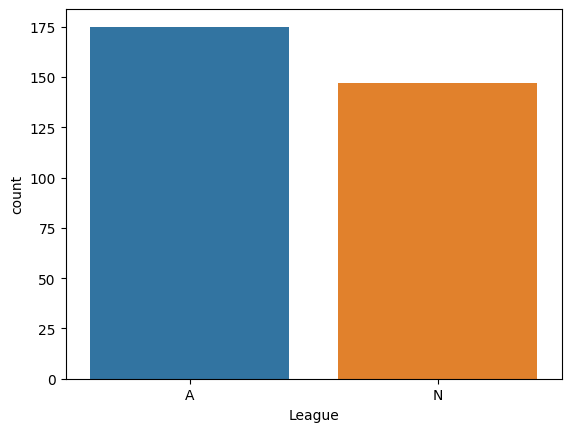

          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
##########################################


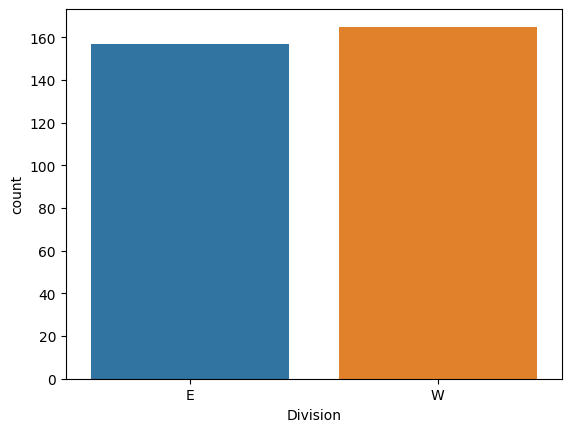

           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
##########################################


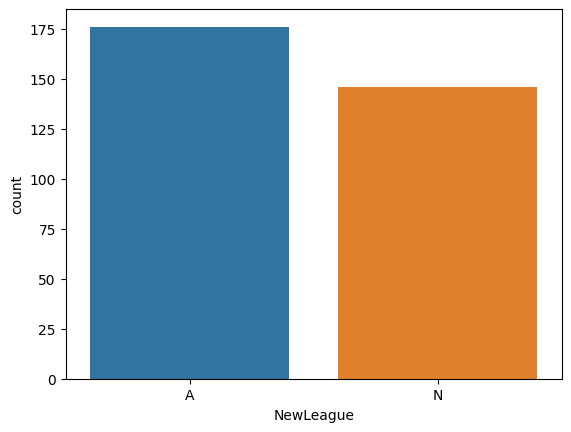

In [6]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

### 4. Analyse der numerischen Variablen

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


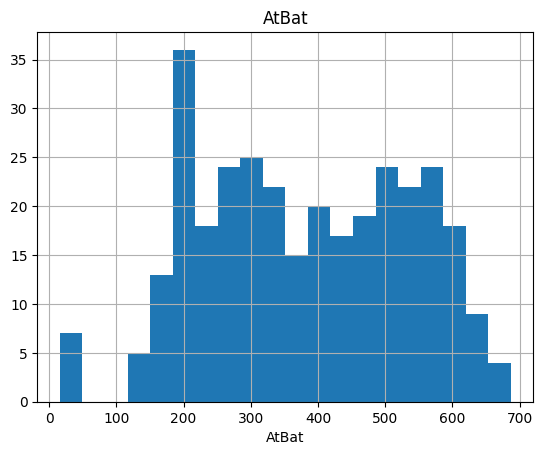

################################################################################################


count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


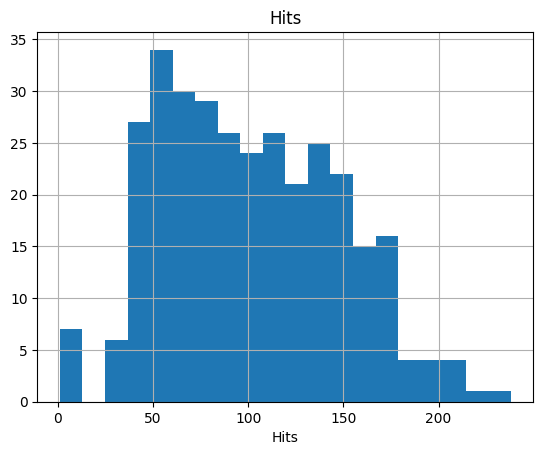

################################################################################################


count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


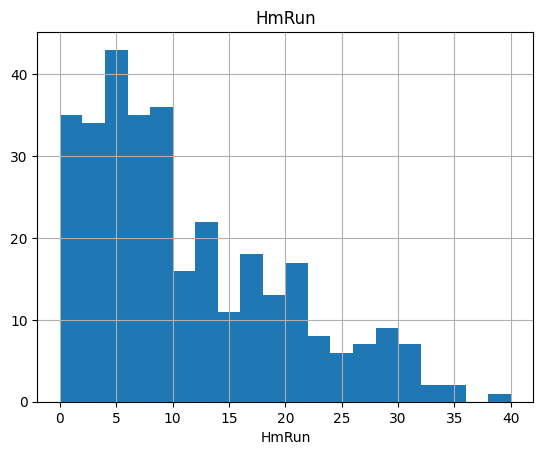

################################################################################################


count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


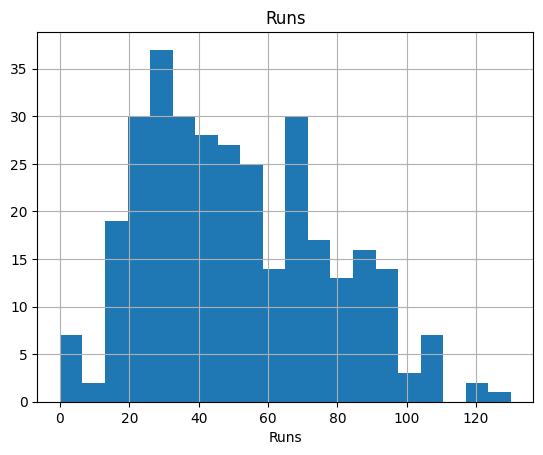

################################################################################################


count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


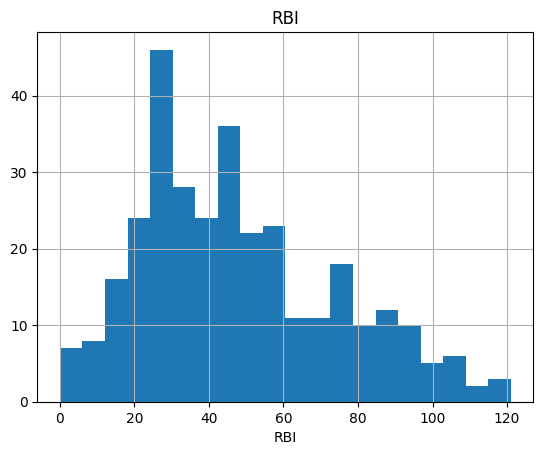

################################################################################################


count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


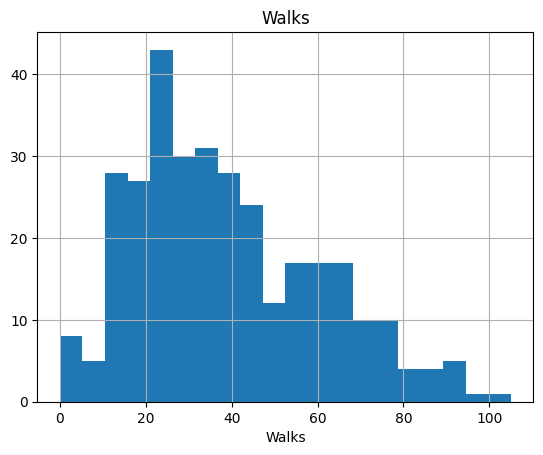

################################################################################################


count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


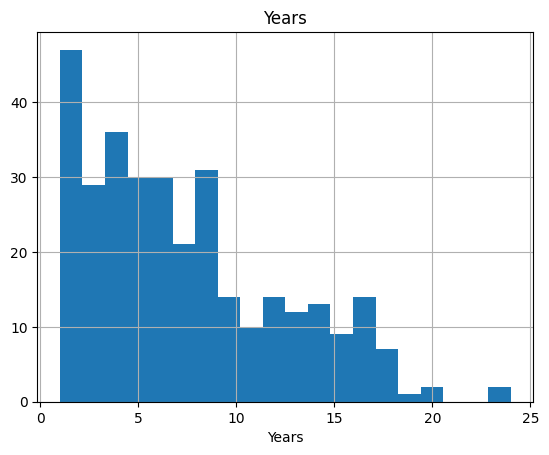

################################################################################################


count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


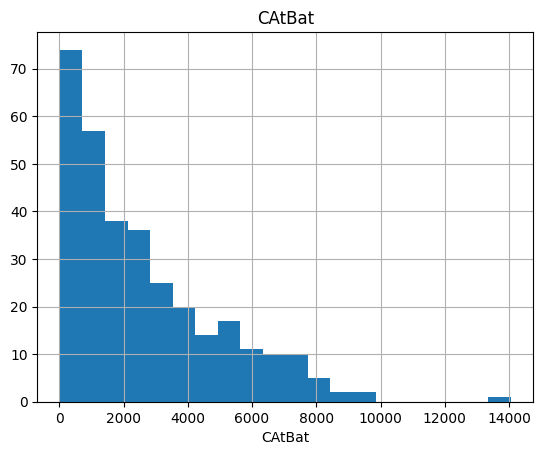

################################################################################################


count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


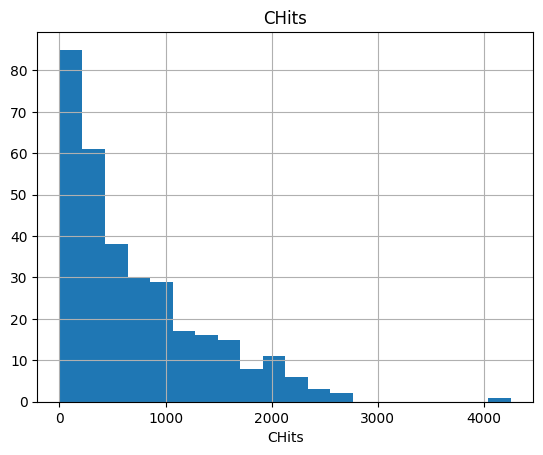

################################################################################################


count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


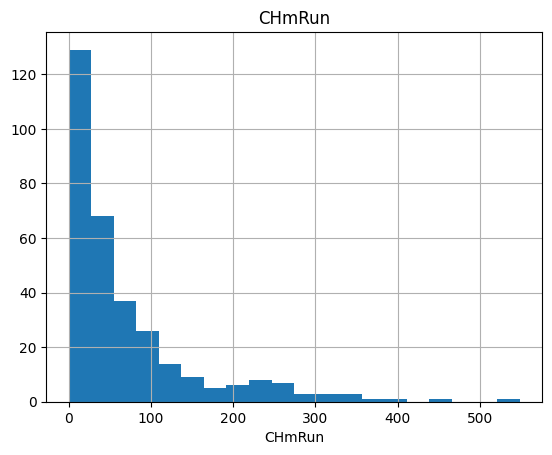

################################################################################################


count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


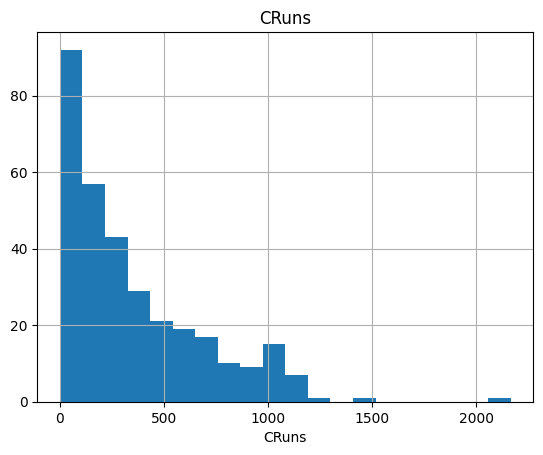

################################################################################################


count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


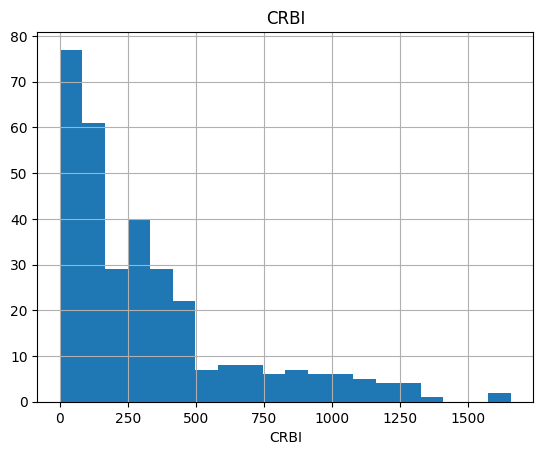

################################################################################################


count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


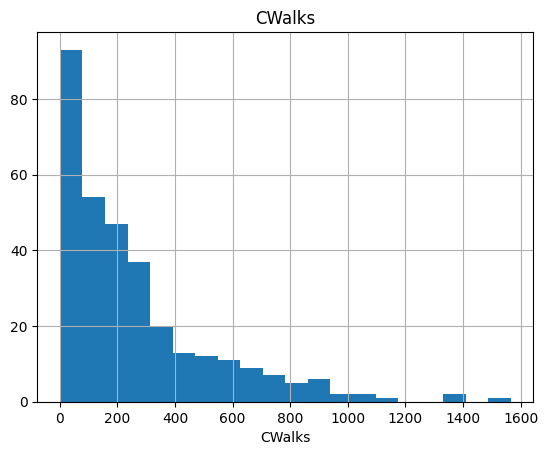

################################################################################################


count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


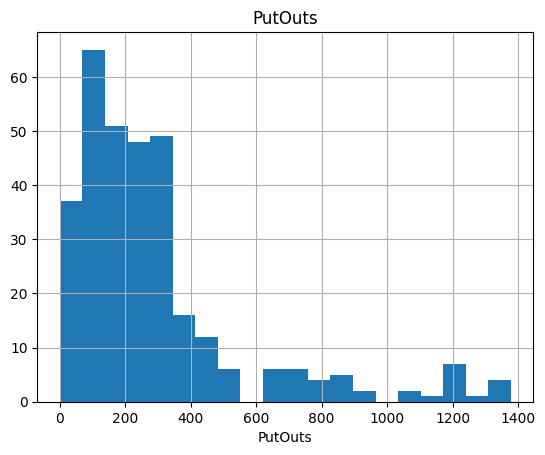

################################################################################################


count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


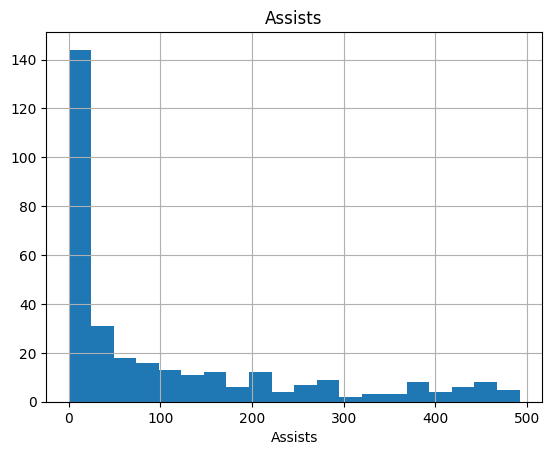

################################################################################################


count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


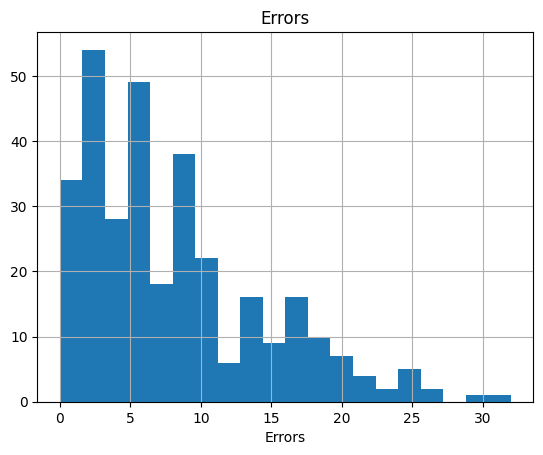

################################################################################################


count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


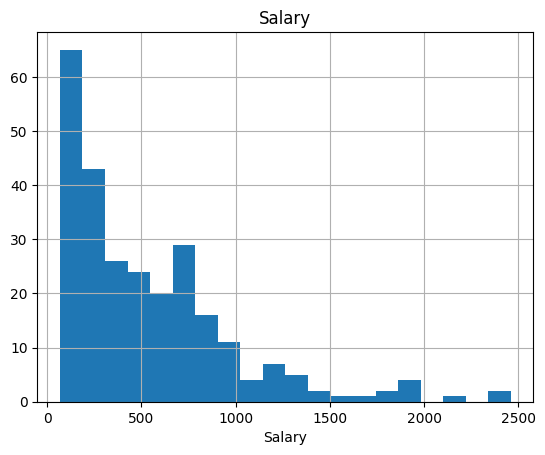

################################################################################################




In [7]:
def num_summary(dataframe, numerical_col, plot=False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        
    print ("################################################################################################\n\n")

for col in num_cols:
    num_summary(df, col, plot=True)

### 5. Analyse der Zielvariable

In [8]:
def target_summary_with_cat(dataframe, target, categorical_col):

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A           542.000
N           529.118


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




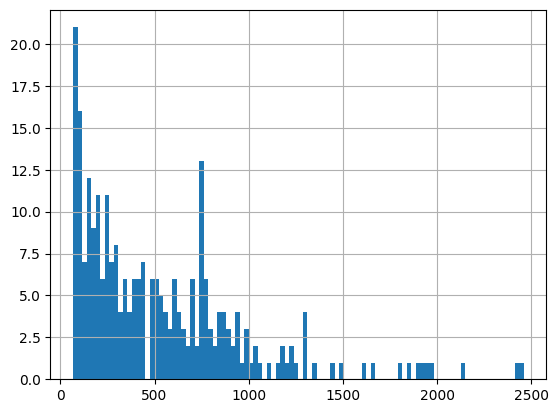

In [9]:
df["Salary"].hist(bins=100)
plt.show(block=True)

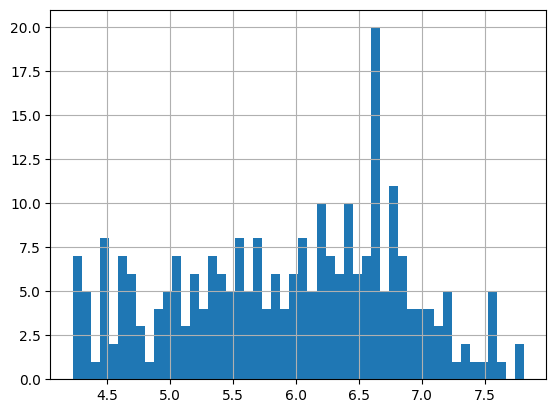

In [10]:
np.log1p(df["Salary"]).hist(bins=50)
plt.show(block=True)

Der Logarithmus glättet die Verteilung der Daten, macht extreme Werte weniger dominant und bringt die Daten näher an eine Normalverteilung. Dies erleichtert die Analyse und Modellierung.

### 6. Analyse der Korrelation

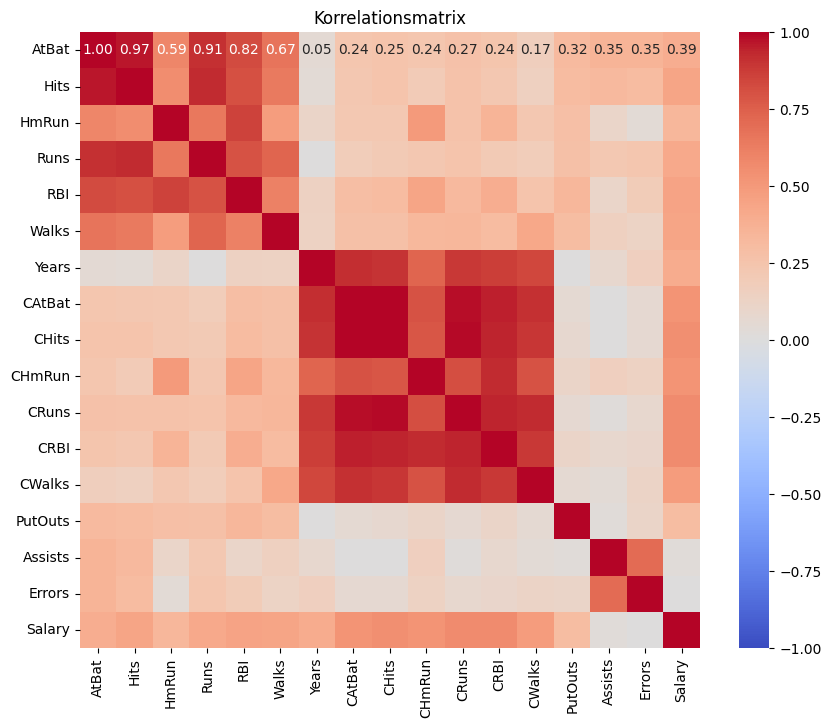

Anzahl der zu entfernenden Spalten: 7


['Runs', 'CRuns', 'Hits', 'CHits', 'CRBI', 'CAtBat', 'CWalks']

In [11]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    """
    Findet hoch korrelierte Spalten im DataFrame und gibt diese zurück.
    Optionale Visualisierung der Korrelationsmatrix.

    Parameters
    ------
        dataframe: DataFrame
            Der DataFrame, der analysiert werden soll.
        plot: bool, optional
            Gibt an, ob die Korrelationsmatrix visualisiert werden soll. Standardwert ist False.
        corr_th: float, optional
            Schwellenwert für die Korrelationsstärke, um als hoch korreliert betrachtet zu werden. Standardwert ist 0.90.

    Returns
    ------
        drop_list: List
            Liste der Namen der Spalten, die aufgrund hoher Korrelation entfernt werden sollten.

    """
    
    # Nur numerische Spalten auswählen
    numeric_df = dataframe.select_dtypes(include=[np.number])
    
    # Berechnung der Korrelationsmatrix
    corr = numeric_df.corr()
    cor_matrix = corr.abs()
    
    # Oberes Dreieck der Korrelationsmatrix extrahieren
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    
    # Finden der Spalten mit hoher Korrelation
    high_corr = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > corr_th)]
    
    # Entfernen von hoch korrelierten Spalten
    drop_list = list(set(high_corr))
    
    # Optionale Visualisierung
    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
        plt.title('Korrelationsmatrix')
        plt.show()
    
    print(f"Anzahl der zu entfernenden Spalten: {len(drop_list)}")
    return drop_list


high_correlated_cols(df, plot=True)

## Feature Engineering

1. Outliers 
2. Missing Values 
3. Feature Extraction 
4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
5. Feature Scaling 

### 1. Outliers

In [12]:
# Bestimmung der Schwellenwerte für Ausreißer

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [13]:
# Überprüfung auf Ausreißer in den Variablen

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [14]:
# Ersetzen der Ausreißer durch Schwellenwert

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [15]:
# Kontrolle:

for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


### 2. Missing Values

In [16]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

missing_values_table(df)


df.dropna(inplace=True)  # Entfernt alle Zeilen im DataFrame, die mindestens einen fehlenden Wert enthalten

        n_miss  ratio
Salary      59 18.320


### 3. Feature Extraction 

In [17]:
new_num_cols=[col for col in num_cols if col!="Salary"]

df[new_num_cols]=df[new_num_cols]+0.0000000001 # Kleine Konstante hinzufügen, um Probleme mit Nullwerten in Berechnungen zu 
# vermeiden und die numerische Genauigkeit zu sichern.


df['NEW_Hits'] = df['Hits'] / df['CHits'] + df['Hits']
df['NEW_RBI'] = df['RBI'] / df['CRBI']
df['NEW_Walks'] = df['Walks'] / df['CWalks']
df['NEW_PutOuts'] = df['PutOuts'] * df['Years']
df["Hits_Success"] = (df["Hits"] / df["AtBat"]) * 100
df["NEW_CRBI*CATBAT"] = df['CRBI'] * df['CAtBat']
df["NEW_RBI"] = df["RBI"] / df["CRBI"]
df["NEW_Chits"] = df["CHits"] / df["Years"]
df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]
df["NEW_CRuns"] = df["CRuns"] / df["Years"]
df["NEW_Chits"] = df["CHits"] * df["Years"]
df["NEW_RW"] = df["RBI"] * df["Walks"]
df["NEW_RBWALK"] = df["RBI"] / df["Walks"]
df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]
df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]
df['NEW_Diff_Atbat'] = df['AtBat'] - (df['CAtBat'] / df['Years'])
df['NEW_Diff_Hits'] = df['Hits'] - (df['CHits'] / df['Years'])
df['NEW_Diff_HmRun'] = df['HmRun'] - (df['CHmRun'] / df['Years'])
df['NEW_Diff_Runs'] = df['Runs'] - (df['CRuns'] / df['Years'])
df['NEW_Diff_RBI'] = df['RBI'] - (df['CRBI'] / df['Years'])
df['NEW_Diff_Walks'] = df['Walks'] - (df['CWalks'] / df['Years'])

### 4. One-Hot Encoding

In [18]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,81.097,0.092,0.104,8848.000,25.714,1427886.000,11690.000,966.000,22.929,1482.000,0.974,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214,True,True,True
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,648.625,82.000,14.000,480.000,130.284,0.271,0.289,1945.875,27.140,431984.000,1371.000,189.000,74.667,5472.000,0.947,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667,False,True,False
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,141.090,0.093,0.105,2200.000,28.427,4716264.000,17325.000,2244.000,75.273,2886.000,2.108,0.280,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818,True,False,True
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,648.625,40.000,4.000,91.500,87.861,0.913,0.909,1297.250,27.103,18216.000,202.000,24.000,24.000,1260.000,1.400,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500,True,False,True
5,594.000,169.000,4.000,74.000,51.000,35.000,11.000,4408.000,1133.000,19.000,501.000,336.000,194.000,282.000,404.500,23.000,750.000,169.149,0.152,0.180,3102.000,28.451,1481088.000,12463.000,209.000,45.545,1785.000,1.457,0.257,0.004,193.273,66.000,2.273,28.455,20.455,17.364,False,True,False


### 5. Feature Scaling 

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in ["Salary"]]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

Observations: 263
Variables: 39
cat_cols: 3
num_cols: 36
cat_but_car: 0
num_but_cat: 3


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,-0.603,-0.596,-0.530,-1.207,-0.522,-0.097,1.409,0.373,0.201,0.110,-0.113,0.366,0.592,2.072,-0.528,0.242,475.000,-0.601,-0.836,-0.793,3.327,-0.168,0.011,0.371,0.302,-1.063,-0.466,-0.580,-0.873,-0.273,-0.004,0.093,-0.280,-0.473,-0.213,0.155,True,True,True
2,0.513,0.492,0.738,0.442,0.795,1.615,-0.905,-0.461,-0.418,0.012,-0.425,-0.169,0.081,2.163,-0.242,0.877,480.000,0.492,-0.230,-0.149,0.056,0.277,-0.468,-0.617,-0.502,1.419,1.488,-0.613,0.805,1.012,-1.149,-1.229,-1.283,-1.010,-1.676,-1.501,False,True,False
3,0.628,0.736,0.969,0.403,1.027,-0.189,0.778,1.369,1.413,2.305,1.518,1.898,0.496,-0.301,-0.762,-0.871,500.000,0.732,-0.831,-0.791,0.176,0.679,1.594,0.910,1.624,1.448,0.221,0.782,0.739,0.838,-0.741,-0.619,-0.402,-1.098,-0.599,-0.358,True,False,True
4,-0.562,-0.462,-0.184,-0.618,-0.367,-0.513,-1.115,-1.022,-1.002,-0.817,-0.991,-0.964,-0.969,2.163,-0.550,-0.712,91.500,-0.451,1.943,2.008,-0.252,0.265,-0.668,-0.729,-0.673,-1.011,-0.575,-0.069,-0.320,0.432,0.471,0.551,0.101,0.295,0.403,0.244,True,False,True
5,1.295,1.358,-0.876,0.757,-0.019,-0.282,0.778,0.812,0.689,-0.704,0.466,0.084,-0.234,0.150,2.118,2.307,750.000,1.355,-0.633,-0.527,0.604,0.686,0.037,0.445,-0.481,0.022,-0.318,-0.000,-0.235,-1.346,1.086,1.443,-0.240,1.036,0.488,0.512,False,True,False


## Modellierung

1. Basismodelle
2. Random Forests
3. GBM Model
4. LightGBM
5. CatBoost
6. Automatisierte Hyperparameter-Optimierung
7. Feature Importance
8. Analyse der Modellkomplexität mit Lernkurven

### 1. Basismodelle

In [20]:
y = df["Salary"]
X = df.drop(["Salary"], axis=1)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]


for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")


RMSE: 236.0151 (LR) 
RMSE: 232.0914 (Ridge) 
RMSE: 230.1802 (Lasso) 
RMSE: 256.2534 (ElasticNet) 
RMSE: 253.4936 (KNN) 
RMSE: 276.4732 (CART) 
RMSE: 204.4894 (RF) 
RMSE: 398.3709 (SVR) 
RMSE: 200.4732 (GBM) 
RMSE: 235.3938 (XGBoost) 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 525.722458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
RMSE: 228.8917 (LightGBM) 
RMSE: 216.6573 (CatBoost) 


Zusätzliche Informationen und Warnungen können die Lesbarkeit der Ausgabe beeinträchtigen. Diese Meldungen sind zwar hilfreich,
um das Modellverhalten detailliert zu überwachen, sind aber für den Vergleich der finalen Evaluationsmetriken nicht erforderlich.
Daher wird verbosity=-1 gesetzt, um eine saubere und übersichtliche Ausgabe zu gewährleisten:


In [21]:
y = df["Salary"]
X = df.drop(["Salary"], axis=1)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbosity=-1)),  # LightGBM-Modell mit unterdrückter Ausgabe und Warnungen für eine saubere Ausgabe
          ("CatBoost", CatBoostRegressor(verbose=False))]


for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 236.0151 (LR) 
RMSE: 232.0914 (Ridge) 
RMSE: 230.1802 (Lasso) 
RMSE: 256.2534 (ElasticNet) 
RMSE: 253.4936 (KNN) 
RMSE: 267.1282 (CART) 
RMSE: 207.827 (RF) 
RMSE: 398.3709 (SVR) 
RMSE: 199.6438 (GBM) 
RMSE: 235.3938 (XGBoost) 
RMSE: 228.8917 (LightGBM) 
RMSE: 216.6573 (CatBoost) 


### 2. Random Forests

In [22]:
rf_model = RandomForestRegressor(random_state=17)

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "sqrt"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [23]:
rmse = np.mean(np.sqrt(-cross_val_score(rf_final, X, y, cv=10, scoring="neg_mean_squared_error")))

rmse

216.07427677139557

### 3. GBM Model

In [24]:
gbm_model = GradientBoostingRegressor(random_state=17)

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17, ).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [25]:
rmse = np.mean(np.sqrt(-cross_val_score(gbm_final, X, y, cv=10, scoring="neg_mean_squared_error")))

rmse

203.202732974011

### 4. LightGBM

In [26]:
lgbm_model = LGBMRegressor(verbosity=-1, random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1],
                "n_estimators": [300, 500],
                "colsample_bytree": [0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [27]:
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv=10, scoring="neg_mean_squared_error")))

rmse

223.25086589452295

### 5. CatBoost

In [28]:
catboost_model = CatBoostRegressor(random_state=17, verbose=False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [29]:
rmse = np.mean(np.sqrt(-cross_val_score(catboost_final, X, y, cv=10, scoring="neg_mean_squared_error")))

rmse

210.40896582670925

### 6. Automatisierte Hyperparameter-Optimierung

In [30]:
rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "sqrt"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}


lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]} 

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}  


regressors = [("RF", RandomForestRegressor(), rf_params),
              ('GBM', GradientBoostingRegressor(), gbm_params),
              ('LightGBM', LGBMRegressor(verbosity=-1), lightgbm_params), 
              ("CatBoost", CatBoostRegressor(verbose=100), catboost_params)]

# Um wieder die Ausgabe zu kürzen und übermäßige Warnungen sowie alle Iterationen zu vermeiden: 
# LightGBM verwendet verbosity=-1, um die Ausgaben auf ein Minimum zu reduzieren, während CatBoost mit verbose=100 nur alle 
# 100 Iterationen anzeigt.

best_models = {}

for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model

    
# Dieser Code führt eine automatisierte Hyperparameter-Optimierung für verschiedene Regressionsmodelle durch. 
# Dabei werden die besten Hyperparameter-Kombinationen für jedes Modell mittels GridSearchCV ermittelt und 
# die Modelle anhand des RMSE (Root Mean Squared Error) bewertet.

########## RF ##########
RMSE: 206.7736 (RF) 
RMSE (After): 213.9466 (RF) 
RF best params: {'max_depth': None, 'max_features': 7, 'min_samples_split': 8, 'n_estimators': 200}

########## GBM ##########
RMSE: 198.422 (GBM) 
RMSE (After): 206.1232 (GBM) 
GBM best params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

########## LightGBM ##########
RMSE: 228.8917 (LightGBM) 
RMSE (After): 223.4899 (LightGBM) 
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}

########## CatBoost ##########
Learning rate set to 0.032591
0:	learn: 403.3340596	total: 6.16ms	remaining: 6.15s
100:	learn: 158.6297743	total: 474ms	remaining: 4.21s
200:	learn: 112.4917584	total: 935ms	remaining: 3.72s
300:	learn: 77.9494423	total: 1.4s	remaining: 3.26s
400:	learn: 57.9331012	total: 1.87s	remaining: 2.79s
500:	learn: 42.8255705	total: 2.34s	remaining: 2.33s
600:	learn: 30.3403713	total: 2.81s	remaining: 1.87s
700:	learn: 22.3038396	total: 

499:	learn: 1.9359704	total: 2.38s	remaining: 0us
0:	learn: 380.5808899	total: 8.96ms	remaining: 4.47s
100:	learn: 75.0973243	total: 506ms	remaining: 2s
200:	learn: 27.2335388	total: 981ms	remaining: 1.46s
300:	learn: 10.4558938	total: 2.2s	remaining: 1.45s
400:	learn: 4.1658810	total: 2.99s	remaining: 739ms
499:	learn: 1.7540897	total: 3.68s	remaining: 0us
0:	learn: 377.8002081	total: 6.39ms	remaining: 3.19s
100:	learn: 74.9469417	total: 535ms	remaining: 2.11s
200:	learn: 25.8425388	total: 973ms	remaining: 1.45s
300:	learn: 8.9957677	total: 1.44s	remaining: 951ms
400:	learn: 3.3669350	total: 1.88s	remaining: 464ms
499:	learn: 1.3966450	total: 2.3s	remaining: 0us
0:	learn: 378.2389146	total: 5.8ms	remaining: 2.89s
100:	learn: 71.9239444	total: 487ms	remaining: 1.93s
200:	learn: 26.0176739	total: 964ms	remaining: 1.43s
300:	learn: 10.2648010	total: 1.44s	remaining: 949ms
400:	learn: 4.2258680	total: 1.93s	remaining: 476ms
499:	learn: 1.7339017	total: 2.4s	remaining: 0us
0:	learn: 385.87

### 7. Feature Importance

In [31]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

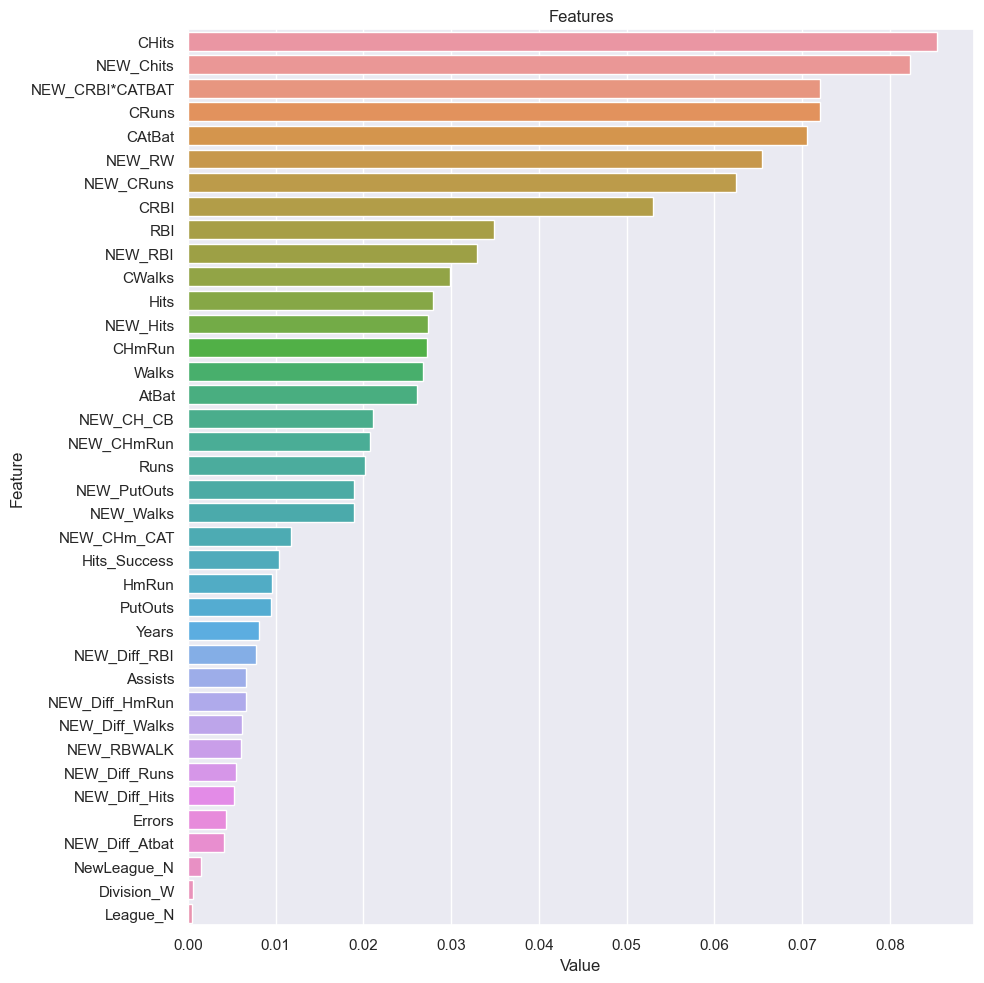

In [32]:
plot_importance(rf_final, X)

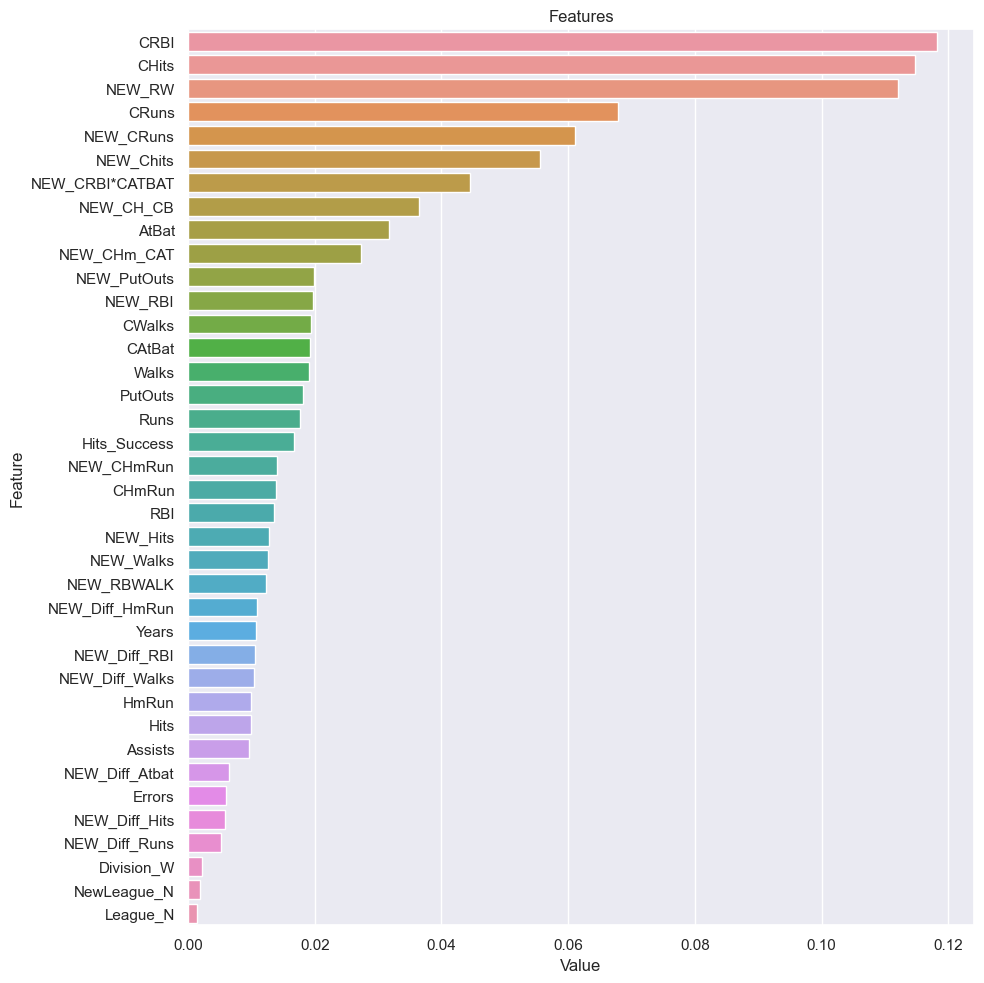

In [33]:
plot_importance(gbm_final, X)

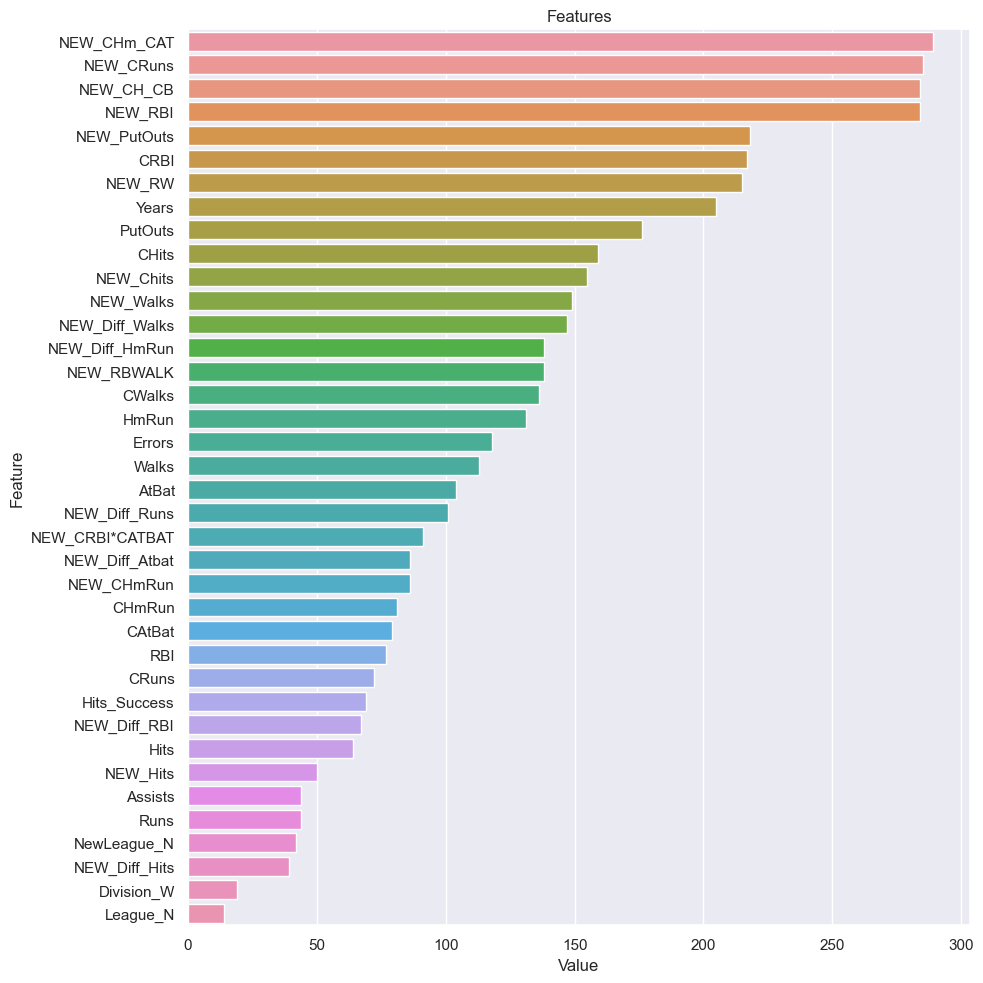

In [34]:
plot_importance(lgbm_final, X)

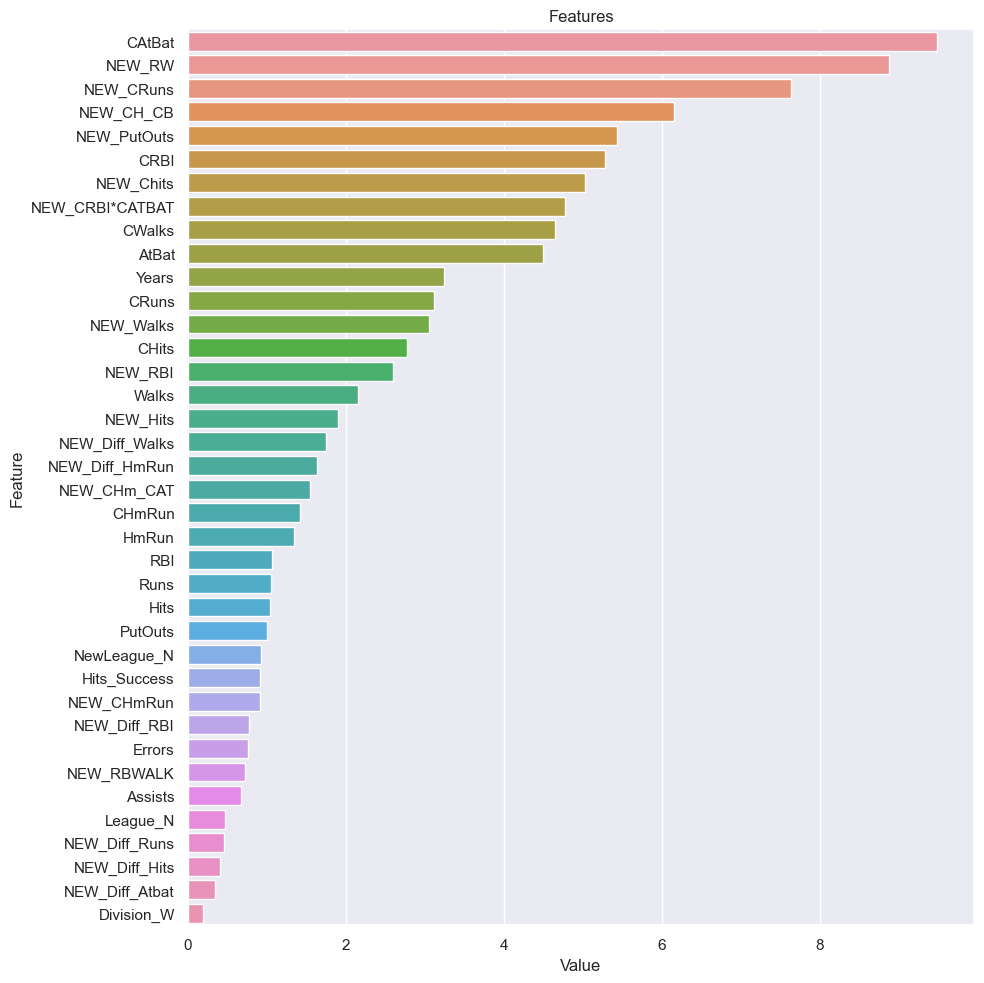

In [47]:
plot_importance(catboost_final, X)

### 8. Analyse der Modellkomplexität mit Lernkurven

In [35]:
# Diese Funktion erstellt eine Validierungskurve zur Analyse der Modellkomplexität in Bezug auf verschiedene Hyperparameter.
# Sie visualisiert, wie sich die Leistung des Modells (Training und Validierung) in Abhängigkeit von einem Hyperparameter ändert.

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

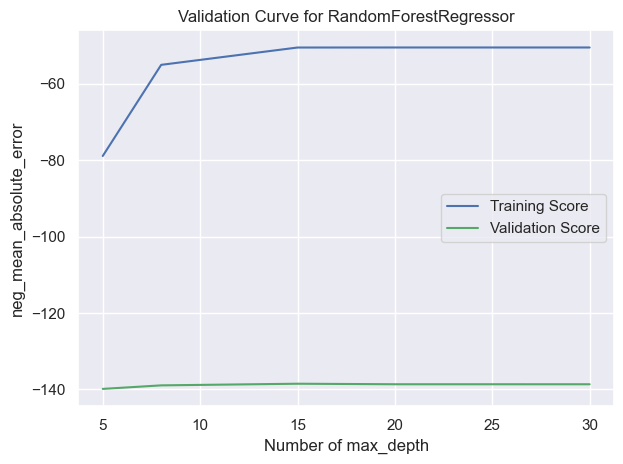

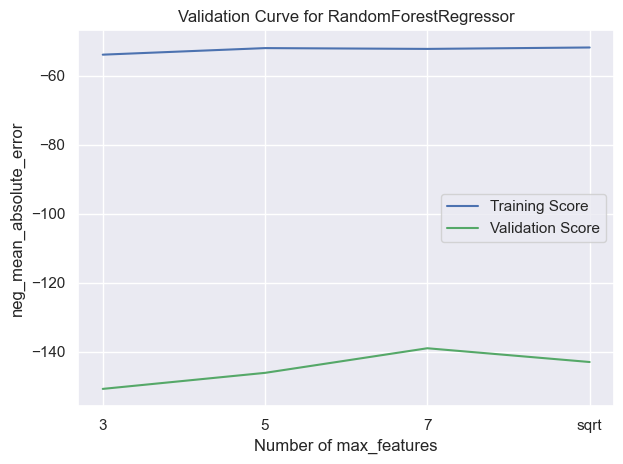

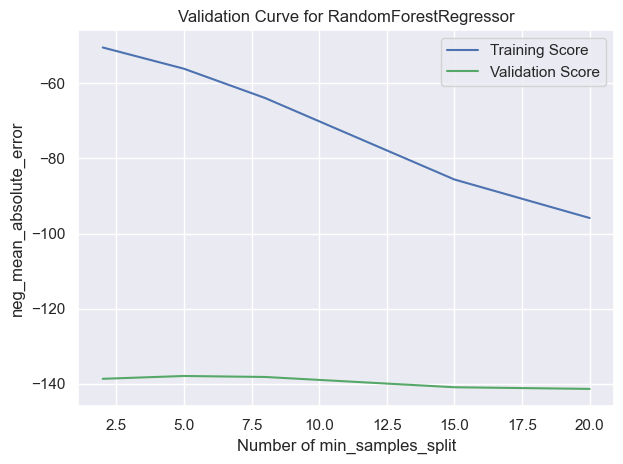

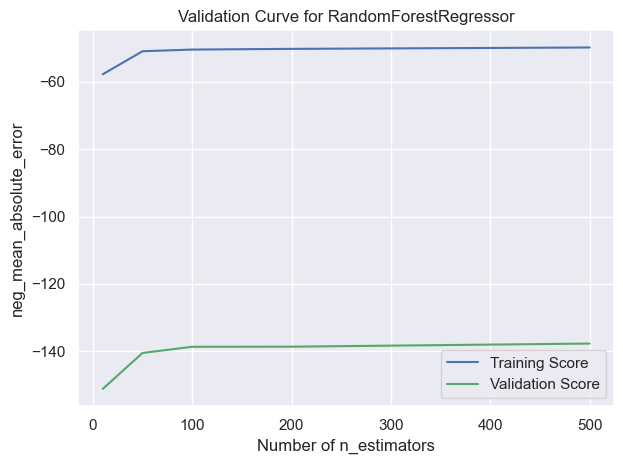

[5, 8, 15, 20, 30, None]

In [36]:
# `rf_val_params` definiert eine Liste von Hyperparametern und ihren Wertebereichen,
# die für die Analyse der Performance von RandomForestRegressor verwendet werden.
# Für jede Parameterkonfiguration wird eine separate Validierungskurve erstellt.

rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "sqrt"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

rf_model = RandomForestRegressor(random_state=17)



# Für jede der definierten Parameterkonfigurationen wird die `val_curve_params`-Funktion aufgerufen,
# um die Lernkurve für den jeweiligen Hyperparameter zu erstellen. 
# Jeder Graph vergleicht die Trainings- und Validierungswerte über den Wertebereich des Parameters.

for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1], scoring="neg_mean_absolute_error")

# Ausgabe der Parameterkonfiguration für den ersten Hyperparameter
rf_val_params[0][1]